<b> Implementation of RNN for Stock Price Prediction</b>

In this notebook, we implement a simple LSTM-based neural network that will be used to predict the Stock Price of a company.

We will be using Keras NN libraryh to implement the LSTM, pandas framework to read the dataset, numpy to do some data manipulation, and matplotlib to plot the prediction.

In [13]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Lets use pandas library to read the csv file. The column that we want to use as our data is in the first column, so we use that particular column as our training data.

In [14]:
# Importing the training set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:,1:2].values
print(training_set.shape)

(1258, 1)


<b> Feature Scaling </b>

We can either use Standardisation (X_stand = (x - mean(x))/(standard deviation(x))

or Normalization (x_norm = (x - min(x))/(max(x) - min(x))


We would like to normalize the stock price for easier processing. We use MinMax Normalization provided by sklearn. The normalization will transform the original stock price into a value in the range (0,1). We can later get back the actual value by inverse transformation.

In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

As we are predicting the next day stock price based on the previous day's stock price, we use the price at time t as the training data and the price at time t+1 as the label for the price at time t.
We split our training data in a way that every price (except the first one) has the succeeding price as its label.

In [16]:
# Getting the inputs and the ouputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

<b> Reshaping </b>

We will be adding one dimension for the timestamp, so we are going to create the 3-D dataset from the 2-D training set.
Also from the Keras library, we can see that the first dimension is the no. of batches (no. of instances), second dimension is the time interval (which is 1 day in our case, so this value is 1), and the third dimension is the no. of input features (as we have only one feature, i.e. the stock price, this is also 1 in our case).

As we have 1257 observations, this will be our first dimension, the time is 1 day, so the second dimension is 1, and the number of features is 1, so the third dimension is 1.

In [17]:
# Reshaping
X_train = np.reshape(X_train, (1257, 1, 1))

<b> Library Imports</b>

We use Keras library for our network. The Sequential class is for the RNN, the Dense class is for the output layer, and the LSTM class is for LSTM network that we are going to use.

In [18]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


As we are going to predict a continuous value, this is a kind of regression task. We just name the object "regressor" for the sake of making it relevance to the task.

In [19]:
# Initialising the RNN
regressor = Sequential()

We add the LSTM layer to our network. The activation function is 'sigmoid' in this case because it was found to give better result rather than the 'tanh'. The input_shape indicates the features that we wanna feed to our network. As we have only one feature, the input_shape is (None, 1), where 'None' indicates we are open to accept any timestamp value, and 1 indicates we are dealing with one feature.

In [20]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

<b> Output Layer </b>

We add our basic output layer. This can be simply achieved by adding the Dense class in our regressor object. The dimension of output layer is 1 because we just predict the stock price which is a single value.

In [21]:
# Adding the output layer
regressor.add(Dense(units = 1))

<b> Compiling network </b>

As the rmsporp optimizer takes more memory, we select adam optimizer here. As we are doing regression instead of classification, we use the mean_squared_error as our loss function.

In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

<b> Fitting the data to model </b>

In [23]:
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s - loss: 0.4000     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.2954     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.2180     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.1628     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.1245     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0993     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0833     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0737     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0684     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0652     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0632     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0619     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 2.5975e-04     
Epoch 101/200
1257/1257 [==============================] - ETA: 0s - loss: 2.6180e-0 - 0s - loss: 2.5995e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 2.5949e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 2.6105e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 2.5975e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 2.5905e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.5859e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2.5868e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 2.5782e-04     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 2.5799e-04     
Epoch 110/200
1257/1257 [==============================] - 0s - loss: 2.5837e-04     
Epoch 111/200
1257/1257 [===============

1257/1257 [==============================] - 0s - loss: 2.5127e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.4991e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.4969e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.5084e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.4849e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.5162e-04     


<b> Predictions </b>

Now we are goinng to predict the stock price and compare with what we have in our test set.

In [24]:
# Getting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values
print(real_stock_price.shape)

(20, 1)


In [26]:
#transform the test data to the scale similar to the train data
inputs = real_stock_price
inputs = sc.transform(inputs)
#reshape as we did in the train data, we have 20 observations, 1 feature and for 1 time
inputs = np.reshape(inputs, (20, 1, 1))
# Getting the predicted stock price of 2017
predicted_stock_price = regressor.predict(inputs)

<b> Inverse transforming the prediction </b>

The predicted value is in normalized form, so we do inverse transform to get the real stock value the model predicted.

In [27]:
#now get the real value, as the predicted _stock_price will have the normalized values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [28]:
#lets see the predicted prices
print(predicted_stock_price)

[[ 778.75036621]
 [ 787.92138672]
 [ 785.73297119]
 [ 794.54022217]
 [ 805.21337891]
 [ 806.61102295]
 [ 803.87304688]
 [ 805.92181396]
 [ 806.24731445]
 [ 805.86444092]
 [ 804.64855957]
 [ 803.98779297]
 [ 805.70166016]
 [ 806.02716064]
 [ 820.41931152]
 [ 827.40875244]
 [ 835.22076416]
 [ 832.26483154]
 [ 813.11688232]
 [ 796.07421875]]


<b> Visualization of predicted result </b>

We are going to visualize the predicted result and see the difference between the actual stock price and the predicted stock price.

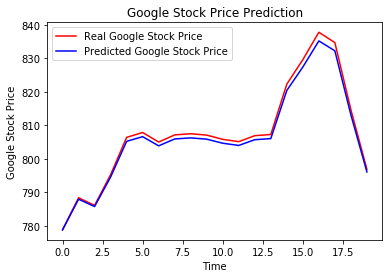

In [31]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

To summarize, the model took the price of one day and predicted the price of next day.
It then took the real price of another day and then predicted the price of the
following day. This process was repeated.
The prediction was made for a single time period and the model may not give
good result if we want to predict the stock price for the whole month, given
the stock price for the first day of the month.

<b> Summary </b>

<ul>
 <li> The reason our predictions are very similar to the inputs is because the network is only learning that the 
prediction(t) = k * input(t-1), with k a small constant. Therefore it is not relevant.

<li> The whole reason why it is not relevant is in the timestep. With our timestep = 1, we train the network by inputing x(t) and learning x(t+1). So what happens is that the states of the hidden layer are reset, after which we input x(t+1) and learn x(t+2), and so on. Hence, since the states are reset after each time t, the network is not learning anything useful, because it is only taking into account the value we are inputting.

<li> Therefore, to fix this and improve our model, we need to increase the timestep. And that's exactly what we'll do in the next section: Evaluating, Improving and Tuning the RNN.

<li> Extra clarification: the article displayed in the lectures is indeed from Stanford, but it is created by undergraduate students of the CS229 course. The students of that course submitted a final project for evaluation; it was just put online but it is not published anywhere. There is a big difference between reading a Stanford paper published online and reading an assignment written by a group of undergrads.
</ul>

<b> Next Steps </b>
<ol> 
<li> First, a little Homework just to practice what we have just seen. Only the choice of timestep = 1 is not relevant, the rest is correct so you can already practice with the code to do this first Homework.

<li> Then, you will learn how to evaluate a RNN model, and more generally, a Regression model (a model that predicts a continuous outcome).

<li> And eventually the most important and final step: we will improve our RNN model, correcting this one timestep defect, by adding more timesteps. We will also consider improving the model by adding more LSTM layers. You will first try to do this final step on your own, this will be the big Homework Challenge of this Part. Good luck with this one.